#### Import of Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

Data Tinkering Functions

In [49]:
#df=df.drop(columns=["at1"])
#df=df.head(900)
#df = df[df != "?"]
#df=df.dropna(axis=0, how="any")
#df=df.astype(float)
#df.to_csv('datasets/blocks/page-blocks-e.csv', index=False)
def valueChange(columnLabel):
    for j in columnLabel:
        y = df[j]
        clas = y.unique()
        for i in range(len(clas)):
            df[j]=df[j].replace(clas[i],i)
        

#### Dataset

In [50]:
df = pd.read_csv('datasets/flare/flare.csv')
valueChange(["LargestSpotSize","SpotDistribution"])


In [51]:
df.head(5)

,LargestSpotSize,SpotDistribution,Activity,Evolution,Prev24Hour,HistComplex,BecomeHist,Area,C-class,M-class,X-class,Class
0,0,0,1,3,1,1,1,1,0,0,0,H
1,1,1,1,3,1,1,2,1,0,0,0,D
2,2,1,1,3,1,1,2,1,0,0,0,C
3,1,0,1,2,1,1,1,1,0,0,0,H
4,2,0,1,1,1,1,2,1,0,0,0,H


In [52]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LargestSpotSize   1066 non-null   int64 
 1   SpotDistribution  1066 non-null   int64 
 2   Activity          1066 non-null   int64 
 3   Evolution         1066 non-null   int64 
 4   Prev24Hour        1066 non-null   int64 
 5   HistComplex       1066 non-null   int64 
 6   BecomeHist        1066 non-null   int64 
 7   Area              1066 non-null   int64 
 8   C-class           1066 non-null   int64 
 9   M-class           1066 non-null   int64 
 10  X-class           1066 non-null   int64 
 11  Class             1066 non-null   object
dtypes: int64(11), object(1)
memory usage: 100.1+ KB
Number of duplicated rows is:  701
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

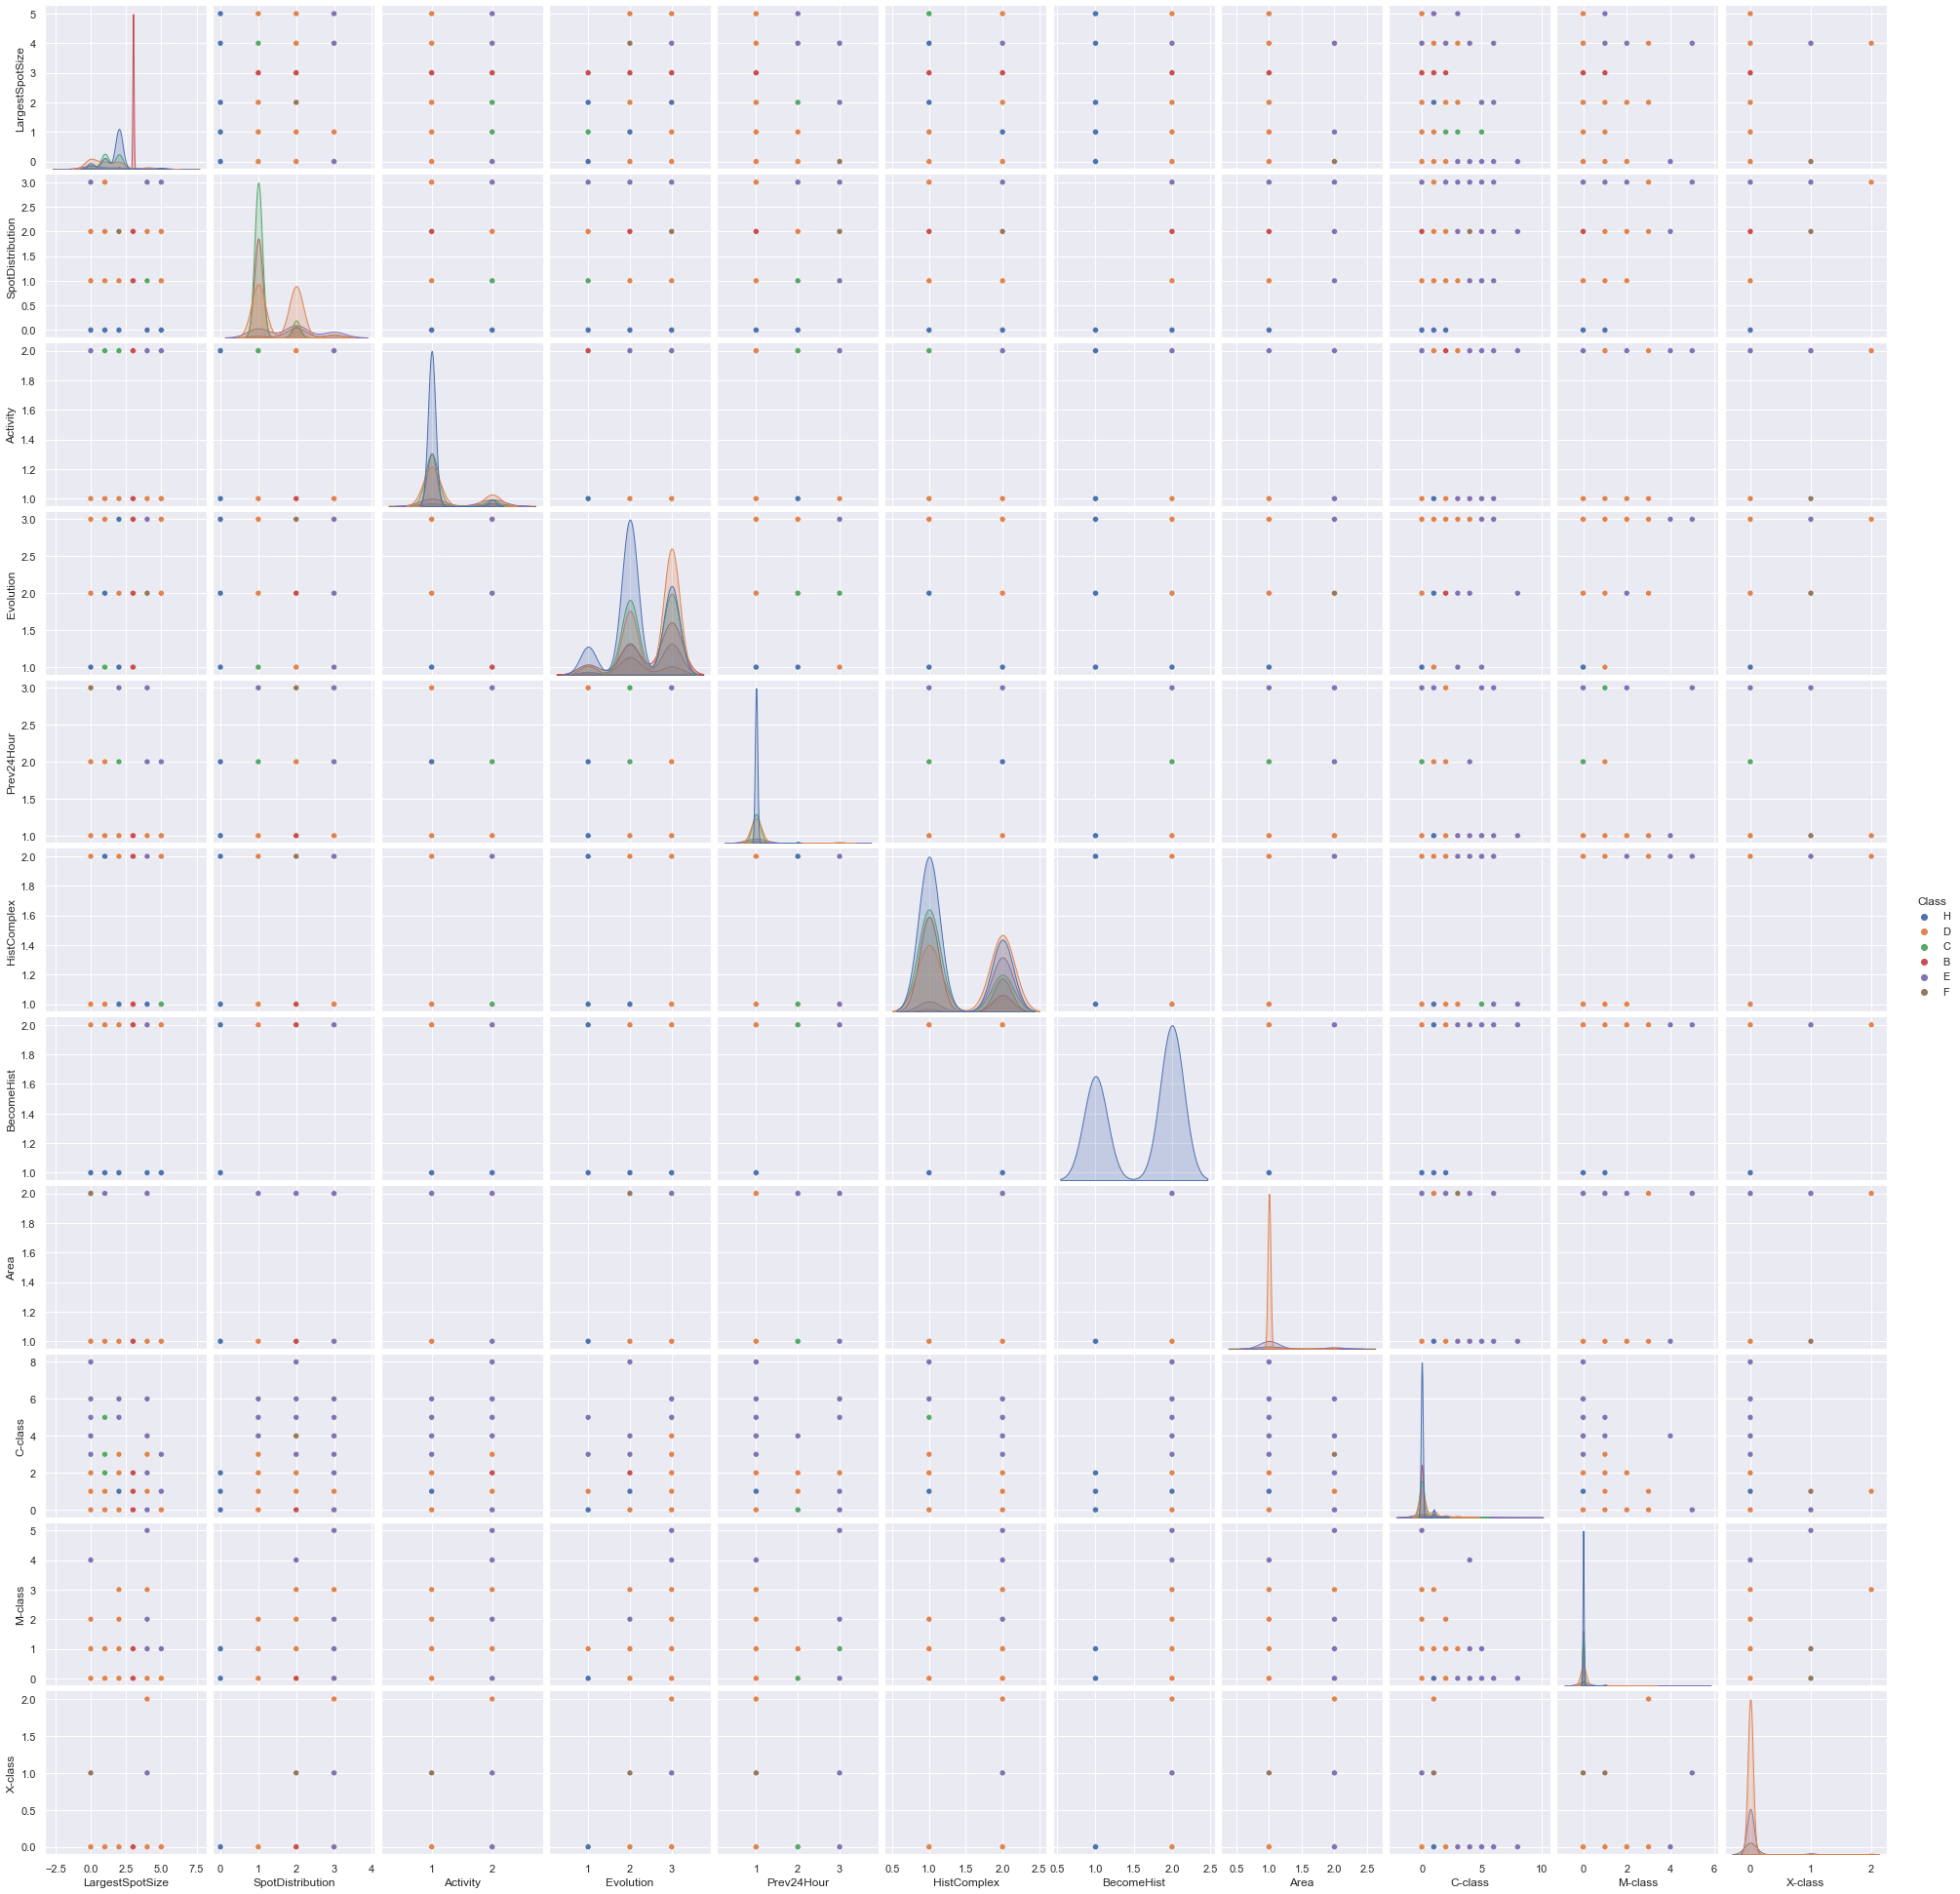

In [53]:
sns.pairplot(df, hue='Class')
plt.show()

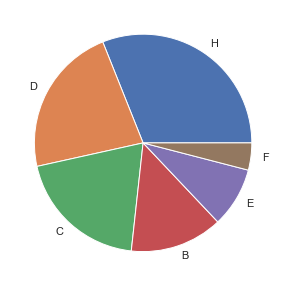

In [54]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [55]:
X = df.drop(columns=['Class'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LargestSpotSize,1066.0,1.688555,1.206633,0.0,1.0,2.0,2.0,5.0
SpotDistribution,1066.0,0.964353,0.806456,0.0,0.0,1.0,1.0,3.0
Activity,1066.0,1.153846,0.360971,1.0,1.0,1.0,1.0,2.0
Evolution,1066.0,2.401501,0.620584,1.0,2.0,2.0,3.0,3.0
Prev24Hour,1066.0,1.059099,0.320324,1.0,1.0,1.0,1.0,3.0
HistComplex,1066.0,1.404315,0.490989,1.0,1.0,1.0,2.0,2.0
BecomeHist,1066.0,1.875235,0.330608,1.0,2.0,2.0,2.0,2.0
Area,1066.0,1.025328,0.157194,1.0,1.0,1.0,1.0,2.0
C-class,1066.0,0.300188,0.835784,0.0,0.0,0.0,0.0,8.0
M-class,1066.0,0.046904,0.302811,0.0,0.0,0.0,0.0,5.0


#### Standardize the Data

In [56]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LargestSpotSize,1066.0,-2.666202e-17,1.000469,-1.400051,-0.570910,0.258232,0.258232,2.745656
SpotDistribution,1066.0,9.998256e-18,1.000469,-1.196352,-1.196352,0.044223,0.044223,2.525374
Activity,1066.0,3.066132e-16,1.000469,-0.426401,-0.426401,-0.426401,-0.426401,2.345208
Evolution,1066.0,-3.945145e-16,1.000469,-2.259418,-0.647276,-0.647276,0.964865,0.964865
Prev24Hour,1066.0,-1.333101e-17,1.000469,-0.184586,-0.184586,-0.184586,-0.184586,6.062029
HistComplex,1066.0,8.331880e-18,1.000469,-0.823857,-0.823857,-0.823857,1.213803,1.213803
BecomeHist,1066.0,2.332926e-16,1.000469,-2.648592,0.377559,0.377559,0.377559,0.377559
Area,1066.0,3.865992e-16,1.000469,-0.161203,-0.161203,-0.161203,-0.161203,6.203344
C-class,1066.0,-3.999302e-17,1.000469,-0.359337,-0.359337,-0.359337,-0.359337,9.217005
M-class,1066.0,-9.998256e-18,1.000469,-0.154969,-0.154969,-0.154969,-0.154969,16.364719


#### Observations and Variables

In [57]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

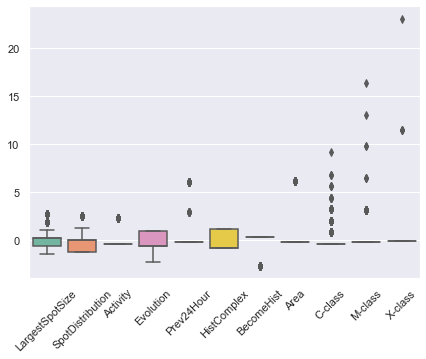

In [58]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

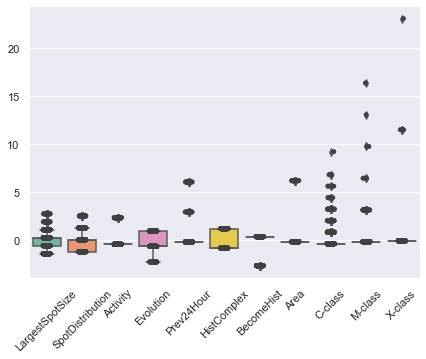

In [59]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

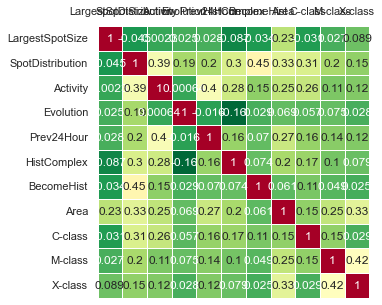

In [60]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [61]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [11] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [10] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [11] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [62]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.841454,0.870908,0.342626,0.521703,2.518474,-0.273777,-0.920702,-0.590906,0.320119,-0.361735
1,-0.547388,-0.051048,-1.253595,0.160856,0.269700,-0.614532,-0.133719,-0.319677,-0.014358,0.003726
2,-0.511537,0.298324,-1.256579,-0.367202,-0.016108,-0.368399,-0.028395,0.009677,-0.064069,0.120706
3,-1.918138,1.043667,1.422915,0.256158,1.506482,0.087494,-0.135454,-0.523089,0.393087,-0.566263
4,-1.294246,0.241987,1.288626,0.137548,-1.267940,-0.182793,1.527574,-0.471074,0.128676,-0.367004
...,...,...,...,...,...,...,...,...,...,...
1061,-1.181712,0.418600,0.205352,-0.124964,-0.541756,-0.297931,0.847649,-0.209536,0.005998,-0.045496
1062,-0.833580,0.166139,0.130883,-0.155993,-0.084341,0.472335,1.404751,-0.437768,0.061097,0.201885
1063,-0.833580,0.166139,0.130883,-0.155993,-0.084341,0.472335,1.404751,-0.437768,0.061097,0.201885
1064,-0.034171,-0.364961,0.635412,0.287738,-1.044507,0.352071,-0.471748,0.281621,-0.442143,0.411278


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'10 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (24.0% expl.var)', ylabel='PC2 (13.0% expl.var)'>)

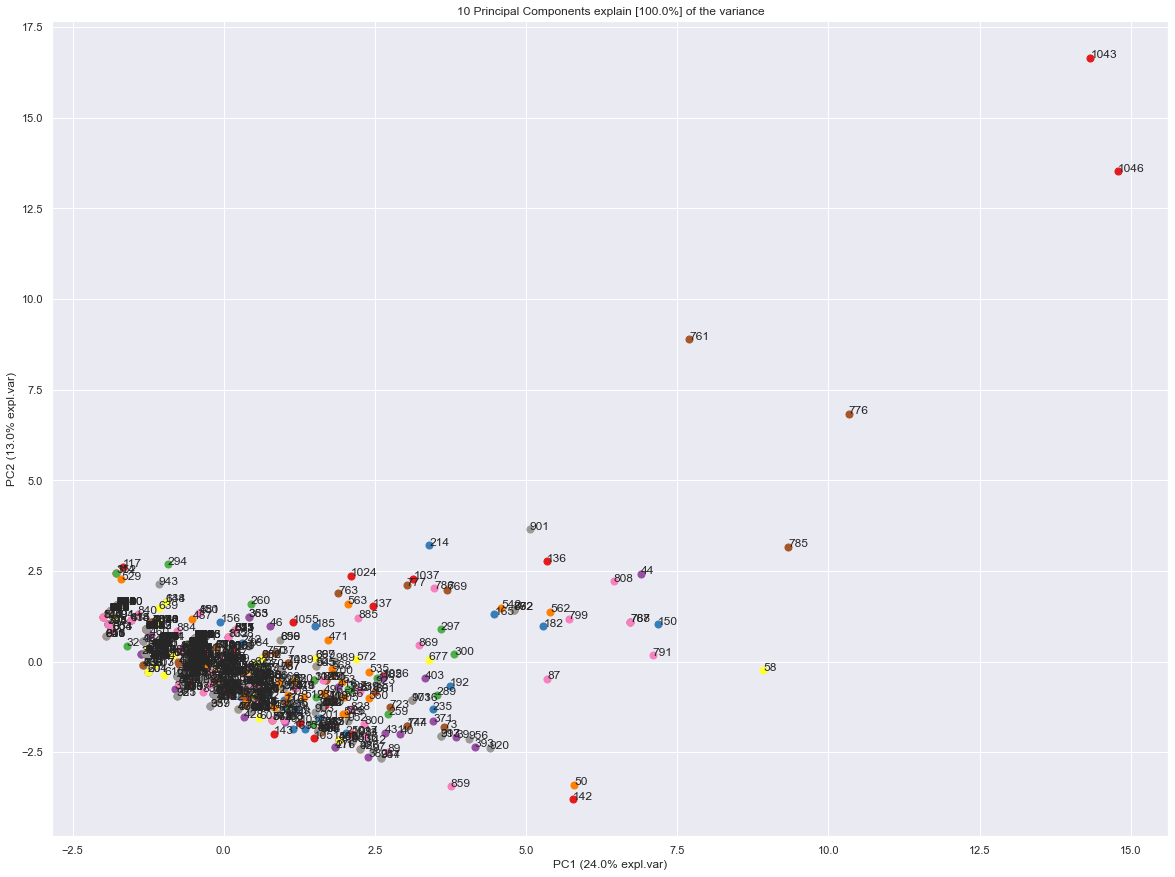

In [63]:
model.scatter(label=True, legend=False)

Eigenvectors

In [64]:
A = out['loadings'].T

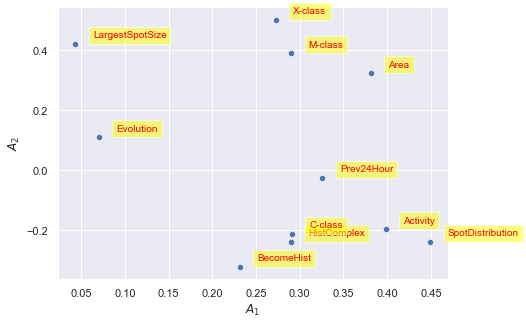

In [65]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

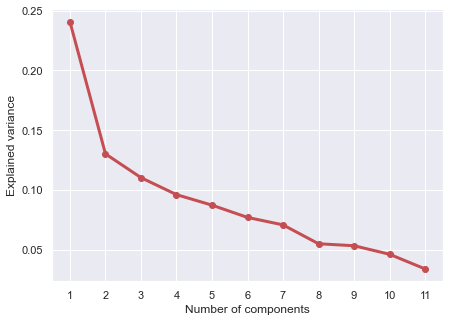

In [66]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

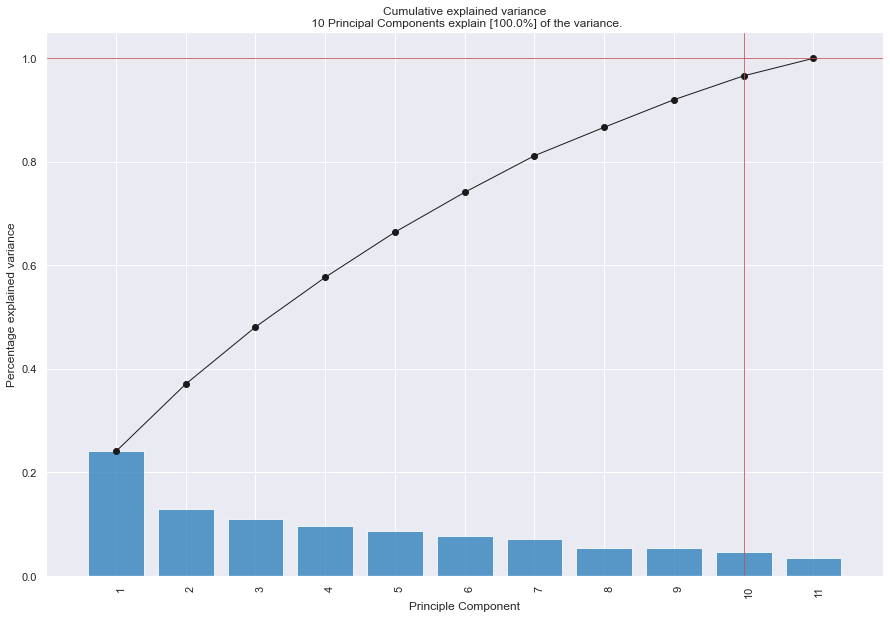

<Figure size 504x360 with 0 Axes>

In [67]:
model.plot();